# OkCupid Date-A-Scientist Project

## Overview

This project analyzes data from **OKCupid**, an app that focuses on using multiple choice and short answers to match users.  The purpose of this project is to practice formulating questions and implementing machine learning techniques to answer those questions.  

## Data Analysis and Visualization Setup

The cell below imports essential Python libraries for data manipulation and visualization:
- `numpy` for numerical computations
- `pandas` for data manipulation and analysis
- `matplotlib.pyplot` for creating plots
- `seaborn` for enhanced statistical visualizations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Check the Data

The OKCupid dataset is stored in the file `profiles.csv` was provided by **Codecademy.com**.  

The dataset provided has the following 31 columns of multiple-choice data:

- **age** 
- **body_type** 
- **diet** 
- **drinks**  
- **drugs** 
- **education** 
- **ethnicity** 
- **height** 
- **income** 
- **job** 
- **last_online** 
- **location**
- **offspring** 
- **orientation** 
- **pets** 
- **religion** 
- **sex** 
- **sign** 
- **smokes** 
- **speaks** 
- **status** 
 
And a set of open short-answer responses to :

- **essay0:** My self-summary
- **essay1:**  What I’m doing with my life
- **essay2:** I’m really good at...
- **essay3:** The first thing people usually notice about me...
- **essay4:** Favorite books, movies, show, music, and food
- **essay5:** The six things I could never do without
- **essay6:** I spend a lot of time thinking about...
- **essay7:** On a typical Friday night I am...
- **essay8:** The most private thing I am willing to admit
- **essay9:** You should message me if...

In [2]:
# Load the OKCupid dataset 
profiles = pd.read_csv('profiles.csv', low_memory=False, encoding='utf-8')

# Display the names of the columns in the dataset
print(profiles.columns) 
# Count the number of columns in the dataset
num_col = len(profiles.columns)
print(f"Number of columns: {num_col}")
# Count the number of rows in the dataset
num_row = len(profiles)
print(f"Number of rows: {num_row}")
# Display the first five rows of the dataset
profiles.head()

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')
Number of columns: 31
Number of rows: 60552


,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


## Explore the Data

To better understand the OKCupid dataset, we use data visualization libraries such as **matplotlib** and **seaborn**. These tools allow us to create informative plots that reveal patterns, trends, and distributions within the data. In the following sections, we will explore various features—such as age, gender, zodiac sign, body type, diet, orientation, pets, religion, and job—by visualizing their distributions and relationships. This exploratory data analysis helps identify key characteristics of the user base and guides further analysis.

### Age and Gender

The cell below focuses on cleaning and visualizing the age data from the OKCupid dataset. It first converts the `'age'` column to a numeric type, removes any rows with missing or invalid ages, and filters out users older than 90 to ensure the data is reasonable.

After cleaning, it creates two plots:
- The first plot shows the overall distribution of ages among users, helping to visualize the most common age ranges on the platform.
- The second plot breaks down the age distribution by gender (using the `'sex'` column), allowing for comparison between different gender groups in the dataset.

Additionally, the cell prints the number of men and women in the dataset, providing a quick summary of the gender distribution.

These visualizations and counts provide insight into the age and gender demographics of OKCupid users and help identify any patterns or anomalies in the data.

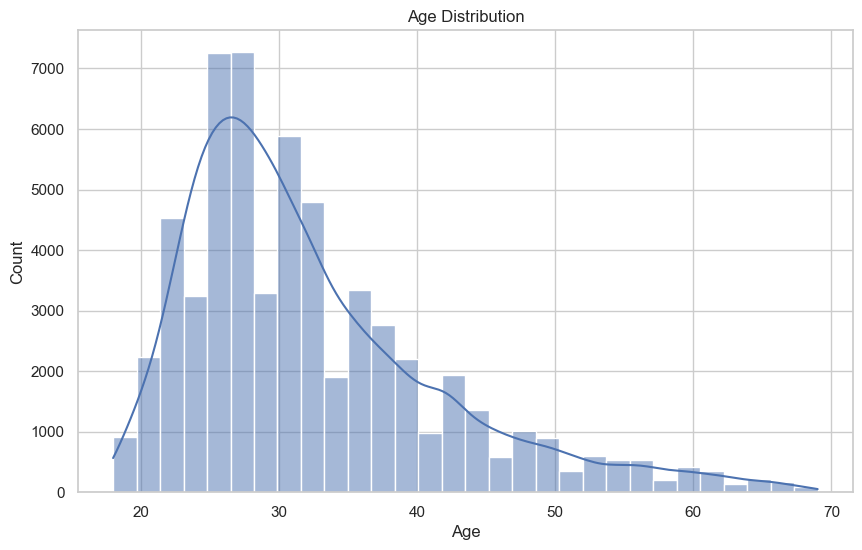

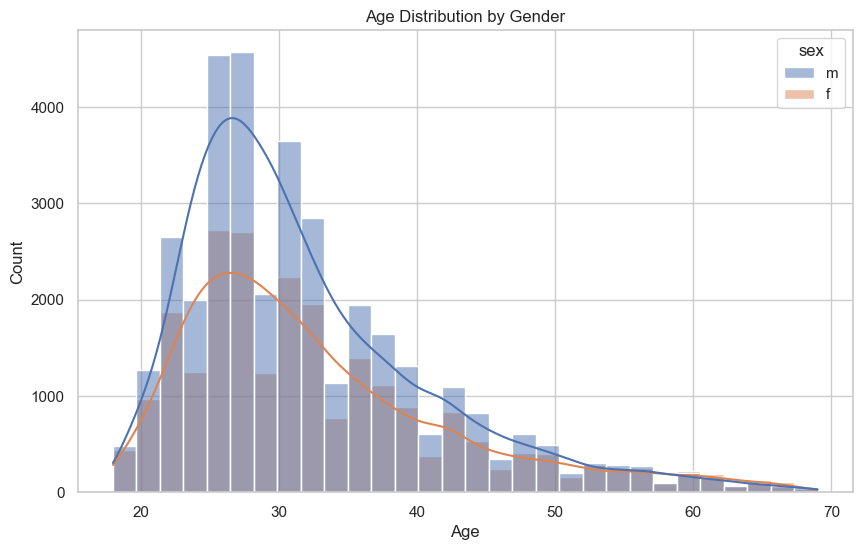

Number of men in dataset: 35825
Number of women in dataset: 24116


In [3]:
# Convert 'age' column to numeric, ignoring errors
profiles['age'] = pd.to_numeric(profiles['age'], errors='coerce')
# Remove rows with NaN values in 'age' column
profiles = profiles.dropna(subset=['age'])
# Filter out ages greater than 90
profiles = profiles[profiles['age'] <= 90]
# This plot shows the distribution of ages in the dataset
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(profiles['age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# This is the same plot, but broken down by gender
plt.figure(figsize=(10, 6))
sns.histplot(data=profiles, x='age', hue='sex', bins=30, kde=True)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Display the number of men and women in the dataset
print("Number of men in dataset:", (profiles['sex'] == 'm').sum())
print("Number of women in dataset:", (profiles['sex'] == 'f').sum())

This cell below calculates and displays descriptive statistics for the `age` column in the dataset, both overall and grouped by gender (`sex`). It computes the mean, median, minimum, maximum, and range of ages, and summarizes these statistics for men and women separately. Additionally, it encodes the `sex` column numerically to calculate the correlation between age and gender, providing insight into any relationship between these variables. The results help to understand the age distribution and gender differences among OKCupid users.

In [4]:
# Descriptive statistics for 'age' overall
age_mean = profiles['age'].mean()
age_median = profiles['age'].median()
age_min = profiles['age'].min()
age_max = profiles['age'].max()
age_range = age_max - age_min

print(f"Age Mean: {age_mean:.2f}")
print(f"Age Median: {age_median:.2f}")
print(f"Age Range: {age_min:.0f} - {age_max:.0f} (Range: {age_range:.0f})")

# Descriptive statistics for 'age' by sex
age_by_sex = profiles.groupby('sex')['age'].agg(['mean', 'median', 'min', 'max', 'count'])
print("\nDescriptive statistics for age by sex:")
print(age_by_sex)

# Encode 'sex' for correlation (m=0, f=1)
profiles_corr = profiles.copy()
profiles_corr['sex_encoded'] = profiles_corr['sex'].map({'m': 0, 'f': 1})

# Correlation between age and sex
corr = profiles_corr[['age', 'sex_encoded']].corr().loc['age', 'sex_encoded']
print(f"\nCorrelation between age and sex (encoded): {corr:.3f}")

Age Mean: 32.34
Age Median: 30.00
Age Range: 18 - 69 (Range: 51)

Descriptive statistics for age by sex:
          mean  median   min   max  count
sex                                      
f    32.815019    30.0  18.0  69.0  24116
m    32.015576    30.0  18.0  69.0  35825

Correlation between age and sex (encoded): 0.042


#### Insights on Age and Gender in the OKCupid Dataset

- **Age Distribution:**  
    The majority of OKCupid users are in their late 20s to early 30s, with ages ranging from 18 to 69. The mean age is approximately 32.3 years, and the median is 30, indicating a slightly right-skewed distribution.

- **Gender Breakdown:**  
    There are more men (35,825) than women (24,116) in the dataset.

- **Age by Gender:**  
    - Both men and women have the same median age (30).
    - The mean age for women is slightly higher (32.8) than for men (32.0).
    - The age range is the same for both genders (18–69).

- **Correlation:**  
    The correlation between age and sex is very weak (0.042), suggesting that age and gender are nearly independent in this dataset.

**Summary:**  
The OKCupid user base is predominantly in their 20s and 30s, with a higher number of men than women. Age distributions are similar for both genders, and there is no meaningful correlation between age and gender.

### Zodiac Sign 

The following two cells focus on analyzing the `sign` column in the OKCupid dataset, which contains users' astrological signs (e.g., "gemini", "cancer", etc.), sometimes with additional descriptive text.

- **First Cell:**  
    - Displays the number of unique values in the original `sign` column.
    - Shows the count of each unique value, including variations like "leo and it’s fun to think about" or "pisces but it doesn’t matter".
    - This helps reveal the diversity and formatting inconsistencies in how users report their zodiac signs.

- **Second Cell:**  
    - Cleans the `sign` column by extracting only the first word (the actual zodiac sign) and stores it in a new column, `sign_cleaned`.
    - Counts the number of unique zodiac signs after cleaning, which should match the standard set of zodiac signs.
    - Displays the frequency of each cleaned zodiac sign, providing a clearer view of the distribution of astrological signs among users.

These steps are important for standardizing the data and enabling meaningful analysis of zodiac sign trends in the dataset. 

In [5]:
# Display the number of unique values in the 'sign' column
print("Number of unique signs:", profiles['sign'].nunique()) 
# Display the unique values in the 'sign' column with their counts
print(profiles['sign'].value_counts())

Number of unique signs: 48
sign
gemini and it&rsquo;s fun to think about         1782
scorpio and it&rsquo;s fun to think about        1772
leo and it&rsquo;s fun to think about            1692
libra and it&rsquo;s fun to think about          1648
taurus and it&rsquo;s fun to think about         1640
cancer and it&rsquo;s fun to think about         1596
pisces and it&rsquo;s fun to think about         1592
sagittarius and it&rsquo;s fun to think about    1583
virgo and it&rsquo;s fun to think about          1574
aries and it&rsquo;s fun to think about          1573
aquarius and it&rsquo;s fun to think about       1503
virgo but it doesn&rsquo;t matter                1497
leo but it doesn&rsquo;t matter                  1457
cancer but it doesn&rsquo;t matter               1454
gemini but it doesn&rsquo;t matter               1453
taurus but it doesn&rsquo;t matter               1450
libra but it doesn&rsquo;t matter                1408
aquarius but it doesn&rsquo;t matter             1

In [6]:
# Split the 'sign' column and keep only the first part (the zodiac sign)
profiles['sign_cleaned'] = profiles['sign'].str.split().str[0]  
# Count the number of unique zodiac signs after cleaning
print("Number of Signs after cleaning:", profiles.sign_cleaned.nunique())  
# Count the occurrences of each zodiac sign after cleaning
print(profiles['sign_cleaned'].value_counts())  

Number of Signs after cleaning: 12
sign_cleaned
leo            4374
gemini         4310
libra          4206
cancer         4205
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3945
sagittarius    3942
aquarius       3927
capricorn      3573
Name: count, dtype: int64


The bar plot below visualizes the percentage distribution of each zodiac sign among users, using the cleaned `sign_cleaned` column. Each bar represents a zodiac sign, and the length of the bar corresponds to its proportion in the dataset. Value labels on each bar show the exact percentage, making it easy to compare the prevalence of different signs within the OKCupid user base. This visualization helps identify which zodiac signs are most and least common among users.

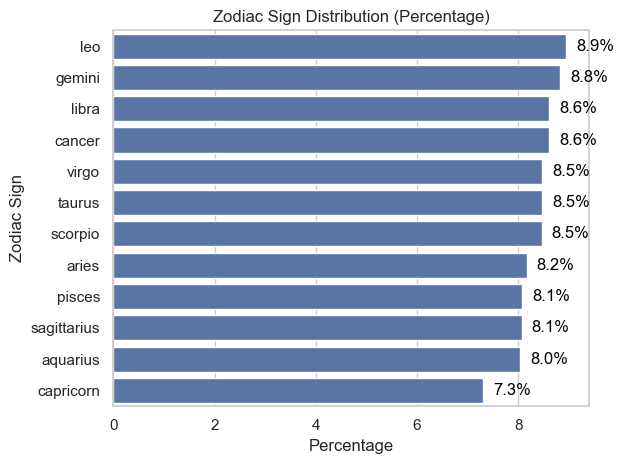

In [7]:
# Calculate the percentage of each zodiac sign
sign_counts = profiles['sign_cleaned'].value_counts(normalize=True) * 100

# Set the style before plotting
sns.set(style="whitegrid")

# Plot the percentage distribution of the 'sign_cleaned' column
ax = sns.barplot(y=sign_counts.index, x=sign_counts.values, orient='h')
ax.set_title('Zodiac Sign Distribution (Percentage)')
ax.set_xlabel('Percentage')
ax.set_ylabel('Zodiac Sign')

# Add value labels to each bar
for i, v in enumerate(sign_counts.values):
    ax.text(v + 0.2, i, f"{v:.1f}%", color='black', va='center')

plt.tight_layout()
plt.show()

### Body Type

The following cell visualizes the distribution of the `body_type` column in the OKCupid dataset using a horizontal bar plot. 

- `sns.countplot(...)` creates a count plot (bar chart) showing the frequency of each body type, ordered by how common they are in the data.
- `plt.title`, `plt.xlabel`, and `plt.ylabel` set the plot's title and axis labels.
- `plt.show()` displays the plot.
- The cell also prints the number of unique body types and the count of each type.

This analysis helps to understand the diversity and prevalence of different body types among users in the dataset.

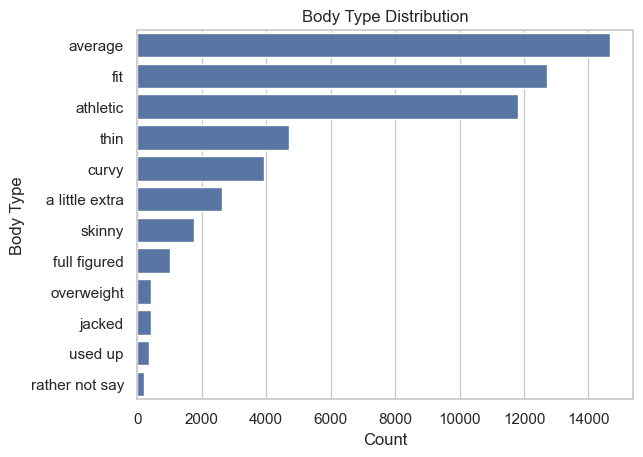

Number of unique body types: 12
body_type
average           14652
fit               12711
athletic          11818
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: count, dtype: int64


In [8]:
# This plot shows the distribution of body type in the dataset
sns.countplot(data=profiles, y='body_type', order=profiles['body_type'].value_counts().index)
plt.title('Body Type Distribution')
plt.xlabel('Count')
plt.ylabel('Body Type')
plt.show()
# Display the number of unique body types
print("Number of unique body types:", profiles['body_type'].nunique())
# Display the unique body types with their counts
print(profiles['body_type'].value_counts())

### Diet

The code below visualizes the distribution of the `diet` column in the OKCupid dataset using a horizontal bar plot, similar to the body type analysis above.
- `sns.countplot(...)` creates a count plot (bar chart) showing how many users fall into each diet category, ordered by frequency.
- `plt.title`, `plt.xlabel`, and `plt.ylabel` set the plot's title and axis labels.
- `plt.show()` displays the plot.

This analysis helps understand the dietary preferences and diversity among users in the dataset.


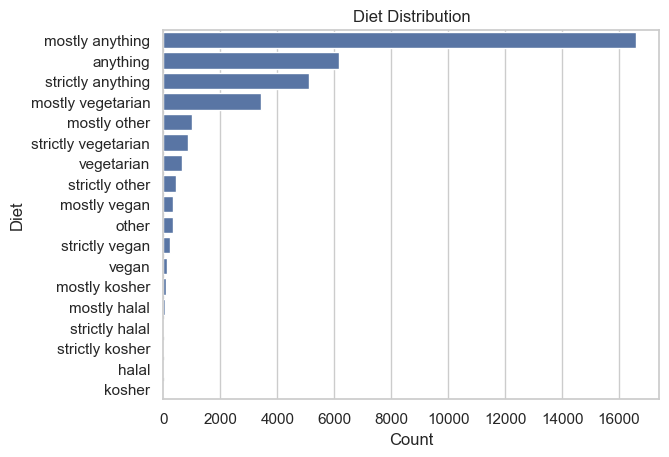

In [9]:
# Plot the distribution of the 'diet' column using a countplot
sns.countplot(data=profiles, y='diet', order=profiles['diet'].value_counts().index)
plt.title('Diet Distribution')
plt.xlabel('Count')
plt.ylabel('Diet')
plt.show()

### Orientation

The following cell visualizes the distribution of the `orientation` column in the OKCupid dataset using a horizontal bar plot.

- `sns.countplot(...)` creates a count plot (bar chart) showing the frequency of each sexual orientation, ordered by how common they are in the data.
- `plt.title`, `plt.xlabel`, and `plt.ylabel` set the plot's title and axis labels.
- `plt.show()` displays the plot.
- The cell also prints the number of unique orientations and the count of each orientation.

This analysis helps to understand the diversity and prevalence of different sexual orientations among users in the dataset.

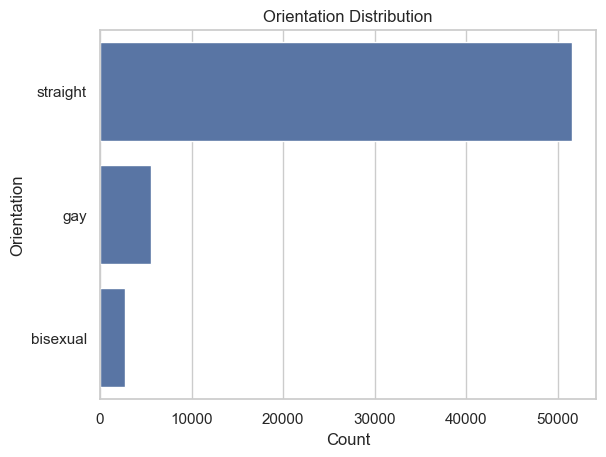

Number of unique orientations: 3
orientation
straight    51601
gay          5573
bisexual     2767
Name: count, dtype: int64


In [10]:
# Plot the distribution of orientation using a countplot
sns.countplot(data=profiles, y='orientation', order=profiles['orientation'].value_counts().index)
plt.title('Orientation Distribution')
plt.xlabel('Count')
plt.ylabel('Orientation')
plt.show()
# Display the number of unique orientations
print("Number of unique orientations:", profiles['orientation'].nunique())
# Display the unique orientations with their counts
print(profiles['orientation'].value_counts())

### Pets

The following cell visualizes the percentage distribution of each pet preference in the `pets` column using a horizontal bar plot. 
- Each bar represents a pet preference category, and its length corresponds to its proportion in the dataset. 
- Value labels on each bar show the exact percentage, making it easy to compare the prevalence of different pet preferences among users. 
- The cell also prints the number of unique pet categories and the count of each category. 

This analysis helps to understand the diversity and prevalence of different pet preferences among users in the dataset.

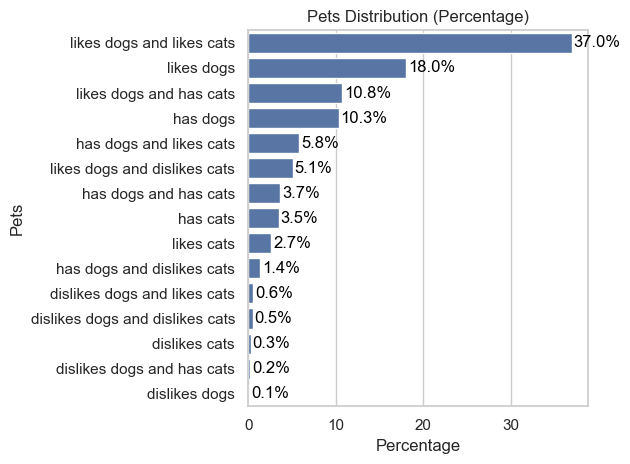

Number of unique pets: 15
pets
likes dogs and likes cats          14813
likes dogs                          7224
likes dogs and has cats             4313
has dogs                            4133
has dogs and likes cats             2333
likes dogs and dislikes cats        2029
has dogs and has cats               1474
has cats                            1406
likes cats                          1063
has dogs and dislikes cats           552
dislikes dogs and likes cats         240
dislikes dogs and dislikes cats      196
dislikes cats                        122
dislikes dogs and has cats            81
dislikes dogs                         44
Name: count, dtype: int64


In [11]:
# Calculate the percentage of each pet category
pet_percent = profiles['pets'].value_counts(normalize=True) * 100

# Plot the percentage distribution of the 'pets' column
ax = sns.barplot(y=pet_percent.index, x=pet_percent.values, orient='h')
ax.set_title('Pets Distribution (Percentage)')
ax.set_xlabel('Percentage')
ax.set_ylabel('Pets')

# Add value labels to each bar
for i, v in enumerate(pet_percent.values):
    ax.text(v + 0.2, i, f"{v:.1f}%", color='black', va='center')

plt.tight_layout()
plt.show()

# Display the number of unique pets
print("Number of unique pets:", profiles['pets'].nunique())
# Display the unique pets with their counts
print(profiles['pets'].value_counts())

### Religion 

The following two cells focus on analyzing the `religion` column in the OKCupid dataset, which contains users' religious affiliations, sometimes with additional descriptive text (e.g., "agnosticism and laughing about it", "catholicism but not too serious about it").

- **First Cell:**  
    - Displays the number of unique values in the original `religion` column.
    - Shows the count of each unique value, including variations like "christianity and somewhat serious about it" or "atheism and very serious about it".
    - This helps reveal the diversity and formatting inconsistencies in how users report their religion.

- **Second Cell:**  
    - Cleans the `religion` column by extracting only the first word (the main religion) and stores it in a new column, `religion_cleaned`.
    - Counts the number of unique religions after cleaning.
    - Displays the frequency of each cleaned religion, providing a clearer view of the distribution of religious affiliations among users.

These steps are important for standardizing the data and enabling meaningful analysis of religion trends in the dataset.

In [12]:
# Display the number of unique values in the 'religion' column
print("Number of unique religions:", profiles['religion'].nunique())
# Display the unique values in the 'religion' column with their counts
print(profiles['religion'].value_counts())

Number of unique religions: 45
religion
agnosticism                                   2723
other                                         2691
agnosticism but not too serious about it      2636
agnosticism and laughing about it             2496
catholicism but not too serious about it      2318
atheism                                       2175
other and laughing about it                   2118
atheism and laughing about it                 2074
christianity                                  1957
christianity but not too serious about it     1952
other but not too serious about it            1554
judaism but not too serious about it          1517
atheism but not too serious about it          1318
catholicism                                   1064
christianity and somewhat serious about it     927
atheism and somewhat serious about it          847
other and somewhat serious about it            845
catholicism and laughing about it              726
judaism and laughing about it             

In [13]:
# Split the 'religion' column and keep only the first part (the main religion)
profiles['religion_cleaned'] = profiles['religion'].str.split().str[0]
# Count the number of unique religions after cleaning
print("Number of religions after cleaning:", profiles['religion_cleaned'].nunique())
# Count the occurrences of each religion after cleaning
print(profiles['religion_cleaned'].value_counts())

Number of religions after cleaning: 9
religion_cleaned
agnosticism     8811
other           7741
atheism         6984
christianity    5787
catholicism     4758
judaism         3098
buddhism        1948
hinduism         450
islam            139
Name: count, dtype: int64


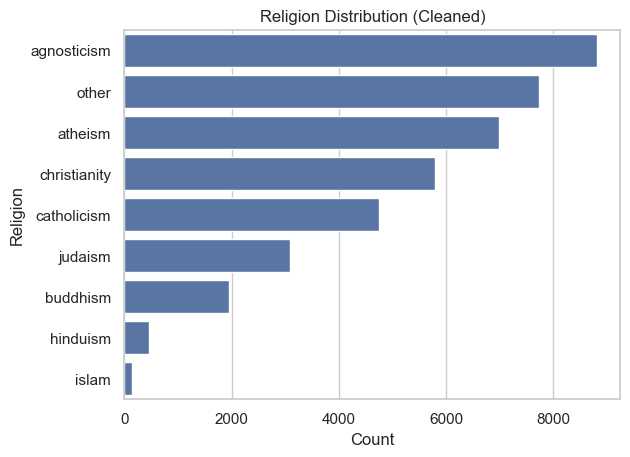

In [14]:
# Plot the distribution of the 'religion_cleaned' column using a countplot
sns.countplot(data=profiles, y='religion_cleaned', order=profiles['religion_cleaned'].value_counts().index)
plt.title('Religion Distribution (Cleaned)')
plt.xlabel('Count')
plt.ylabel('Religion')
plt.show()

The next cell checks for missing (null) values in each column of the `profiles` DataFrame. It uses the `isnull().sum()` method to count the number of null entries per column, helping to identify which columns have incomplete data and may require cleaning or special handling in further analysis.

### Job

The following cell visualizes the distribution of the `job` column in the OKCupid dataset using a horizontal bar plot.

- `sns.countplot(...)` creates a count plot (bar chart) showing the frequency of each job category, ordered by how common they are in the data.
- `plt.title`, `plt.xlabel`, and `plt.ylabel` set the plot's title and axis labels.
- `plt.show()` displays the plot.
- The cell also prints the number of unique job categories and the count of each job.

This analysis helps to understand the diversity and prevalence of different occupations among users in the dataset.

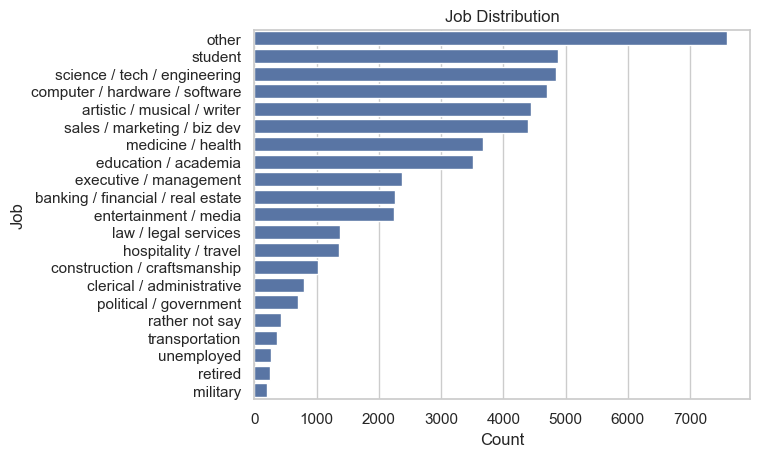

Number of unique jobs: 21
job
other                                7588
student                              4881
science / tech / engineering         4848
computer / hardware / software       4709
artistic / musical / writer          4438
sales / marketing / biz dev          4391
medicine / health                    3679
education / academia                 3513
executive / management               2373
banking / financial / real estate    2266
entertainment / media                2250
law / legal services                 1381
hospitality / travel                 1364
construction / craftsmanship         1021
clerical / administrative             805
political / government                708
rather not say                        436
transportation                        366
unemployed                            273
retired                               250
military                              204
Name: count, dtype: int64


In [15]:
# Plot the distribution of the 'job' column using a countplot
sns.countplot(data=profiles, y='job', order=profiles['job'].value_counts().index)
plt.title('Job Distribution')
plt.xlabel('Count')
plt.ylabel('Job')
plt.show()

# Display the number of unique jobs
print("Number of unique jobs:", profiles['job'].nunique())
# Display the unique jobs with their counts
print(profiles['job'].value_counts())

### Missing Data

The cell below will use `profiles.isnull().sum()` to check for missing (null) values in each column of the `profiles` DataFrame. 

- `isnull()` returns a DataFrame of the same shape as `profiles`, with `True` for each missing value and `False` otherwise.
- `sum()` then counts the number of `True` values (i.e., missing entries) in each column.

The result is a Series showing the total number of missing values for every column, helping to identify which columns have incomplete data and may require cleaning or special handling in further analysis.

In [16]:
# Check for any remaining null values in the dataset
profiles.isnull().sum()  

age                     0
body_type            5295
diet                24394
drinks               2983
drugs               14079
education            6627
essay0               5486
essay1               7571
essay2               9637
essay3              11476
essay4              10536
essay5              10851
essay6              13772
essay7              12452
essay8              19226
essay9              12604
ethnicity            5681
height                  6
income                  3
job                  8200
last_online             3
location                3
offspring           35562
orientation             3
pets                19921
religion            20228
sex                     3
sign                11058
smokes               5514
speaks                 53
status                  3
sign_cleaned        11058
religion_cleaned    20228
dtype: int64

### Data Exploration Summary

The exploratory data analysis of the OKCupid dataset reveals several key insights about the user base:

- **Demographics:**  
    The majority of users are in their late 20s to early 30s, with a mean age of about 32.3 years. There are more men than women, but both genders share similar age distributions.

- **Zodiac Signs:**  
    All twelve zodiac signs are well-represented, with slight variations in frequency. The cleaning process standardized the sign data, enabling clearer comparisons.

- **Body Type, Diet, and Orientation:**  
    Users report a wide range of body types and dietary preferences, reflecting diversity in self-presentation and lifestyle. The most common sexual orientation is "straight," but other orientations are also present.

- **Pets and Religion:**  
    Pet preferences are varied, with "likes dogs and likes cats" being the most common. Religious affiliations are diverse, and cleaning the data helped group similar responses for better analysis.

- **Jobs:**  
    Users list a broad spectrum of occupations, highlighting the platform's appeal to people from many professional backgrounds.

- **Missing Data:**  
    Some columns, such as essays and offspring, have substantial missing values, which should be considered in further analyses.

Overall, the dataset is rich and diverse, providing a solid foundation for deeper analysis and machine learning applications. The cleaning and visualization steps performed here ensure that subsequent analyses will be more accurate and meaningful.

## Preprocessing Data

The following cells perform essential preprocessing steps to prepare the OKCupid dataset for machine learning modeling:

- **Column Selection and Subsetting:**  
    A subset of relevant columns is selected from the original `profiles` DataFrame, focusing on categorical features such as body type, diet, orientation, pets, religion, sex, job, and zodiac sign. Rows with missing values in any of these columns are dropped to ensure a clean dataset for modeling.

- **One-Hot Encoding:**  
    Categorical variables are converted into numerical format using one-hot encoding (`pd.get_dummies`). This process creates new binary columns for each category, allowing machine learning algorithms to interpret the data.

- **Verification of Encoding:**  
    The transformed DataFrame is displayed, showing the new dummy variable columns and the updated shape. This step confirms that the encoding was successful and provides an overview of the expanded feature set.

- **Target Distribution Check:**  
    The distribution of the target variable (`sign_cleaned`, representing zodiac signs) is displayed for the subset, ensuring that all classes are represented and identifying any class imbalance.

- **Train/Validation Split:**  
    The dataset is split into features (`X`) and target (`Y`), then further divided into training and validation sets using `train_test_split` from scikit-learn. This split (80% training, 20% validation) is crucial for evaluating model performance on unseen data.

These preprocessing steps transform the raw data into a structured, numerical format suitable for machine learning, ensuring that the model can learn effectively from the available features.

In [17]:
# List of columns to keep in the new DataFrame
cols = ['body_type', 'diet', 'orientation', 'pets', 'religion_cleaned', 'sex', 'job', 'sign_cleaned'] 
# Create a new DataFrame with the selected columns and drop rows with NaN values
profiles_subset = profiles[cols].dropna() 
# Print a message indicating the creation of the subset
print("Subset of profiles with selected columns:")   
# Display the first few rows of the new DataFrame
print(profiles_subset.head())
# Display the shape of the new DataFrame
print("Shape of the subset DataFrame:", profiles_subset.shape)

Subset of profiles with selected columns:
        body_type               diet orientation                       pets  \
0  a little extra  strictly anything    straight  likes dogs and likes cats   
1         average       mostly other    straight  likes dogs and likes cats   
5         average    mostly anything    straight                 likes cats   
7         average    mostly anything    straight  likes dogs and likes cats   
9        athletic    mostly anything    straight  likes dogs and likes cats   

  religion_cleaned sex                             job sign_cleaned  
0      agnosticism   m                  transportation       gemini  
1      agnosticism   m            hospitality / travel       cancer  
5          atheism   m  computer / hardware / software       taurus  
7     christianity   f     artistic / musical / writer  sagittarius  
9          atheism   m                         student       cancer  
Shape of the subset DataFrame: (16451, 8)


The following two cells perform one-hot encoding on the categorical variables in the `profiles_subset` DataFrame and display the resulting DataFrame:

- **First Cell:**  
    - Iterates through each categorical column (except the target `sign_cleaned`) and applies `pd.get_dummies()` to convert each category into a separate binary (0/1) column.
    - This transformation prepares the data for machine learning models, which require numerical input.

- **Second Cell:**  
    - Prints the first few rows of the transformed DataFrame to show the new dummy variable columns.
    - Displays the shape of the DataFrame, indicating the increased number of columns after encoding.  
    - This helps verify that the encoding was successful and provides an overview of the new feature set.

In [18]:
# Convert categorical columns to dummy variables
for col in cols[:-1]:
    profiles_subset = pd.get_dummies(profiles_subset, columns=[col], prefix=col) 

In [19]:
# Display the first few rows of the DataFrame with dummy variables
print("DataFrame with dummy variables:")
print(profiles_subset.head())
# Display the shape of the DataFrame with dummy variables
print("Shape of the DataFrame with dummy variables:", profiles_subset.shape)

DataFrame with dummy variables:
  sign_cleaned  body_type_a little extra  body_type_athletic  \
0       gemini                      True               False   
1       cancer                     False               False   
5       taurus                     False               False   
7  sagittarius                     False               False   
9       cancer                     False                True   

   body_type_average  body_type_curvy  body_type_fit  body_type_full figured  \
0              False            False          False                   False   
1               True            False          False                   False   
5               True            False          False                   False   
7               True            False          False                   False   
9              False            False          False                   False   

   body_type_jacked  body_type_overweight  body_type_rather not say  ...  \
0             False       

This cell displays the counts of each zodiac sign in the `profiles_subset` DataFrame, showing how many users in the subset belong to each sign. This helps to understand the distribution of zodiac signs in the prepared dataset for modeling.

In [20]:
# Display the counts of each zodiac sign in the subset
profiles_subset.sign_cleaned.value_counts()

sign_cleaned
leo            1516
gemini         1496
cancer         1456
virgo          1451
taurus         1390
scorpio        1356
libra          1353
pisces         1334
aries          1328
sagittarius    1312
aquarius       1262
capricorn      1197
Name: count, dtype: int64

The cell below splits the dataset into training and validation sets for machine learning.  
- `X` contains the features (all columns except the target).
- `Y` contains the target variable (`sign_cleaned`).
- `train_test_split` randomly splits the data: 80% for training (`X_train`, `Y_train`) and 20% for validation (`X_val`, `Y_val`).
- The target arrays are flattened for compatibility with scikit-learn models.

In [21]:
# Count the number of columns in the subset DataFrame
col_length = len(profiles_subset.columns) 

# Features (all columns except the first one)
X = profiles_subset.iloc[:, 1:col_length] 
# 'sign_cleaned' is the target variable
Y = profiles_subset.iloc[:, 0:1] 

# Set the validation size to 20%
val_size = 0.2 

# Split the dataset into training and validation sets using train_test_split from sklearn
from sklearn.model_selection import train_test_split 
# Ensure reproducibility with random_state=0 
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=val_size, random_state=0) 

# Convert Y_train and Y_val to numpy arrays and flatten them to 1D
Y_train = Y_train.to_numpy().ravel() 
Y_val = Y_val.to_numpy().ravel()  